In [1]:
from tensorflow.keras.models import Model as KerasModel
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import matplotlib.pylab as plt
from PIL import Image
import cv2
from facenet_pytorch import MTCNN
import pandas as pd
import os
from glob import glob
import numpy as np

In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from keras.utils import Sequence

Using TensorFlow backend.


In [6]:
IMGWIDTH = 256

In [7]:
class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def train(self, train_generator, validation_data, callbacks, steps_per_epoch, validation_steps, epochs, use_multiprocessing, workers):
        return self.model.fit_generator(train_generator, validation_data, callbacks, steps_per_epoch, epochs, validation_steps, use_multiprocessing, workers)
    
    def train_1(self, train_generator, validation_data, steps_per_epoch, epochs, validation_steps, use_multiprocessing, workers):
        return self.model.fit_generator(train_generator, validation_data, steps_per_epoch, epochs, validation_steps, use_multiprocessing, workers)
    
    def train_2(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def evaluate(self, validation_data):
        return self.model.evaluate_generator(validation_data)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [9]:
class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (IMGWIDTH, IMGWIDTH, 3))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return KerasModel(inputs = x, outputs = y)

In [14]:
optimizer = Adam(lr = 0.01)

x = Input(shape = (IMGWIDTH, IMGWIDTH, 3))

x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)

y = Flatten()(x4)
y = Dropout(0.5)(y)
y = Dense(16)(y)
y = LeakyReLU(alpha=0.1)(y)
y = Dropout(0.5)(y)
y = Dense(1, activation = 'sigmoid')(y)

#model = KerasModel(inputs = x, outputs = y)
model = keras.Model(inputs = x, outputs = y)
model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])

In [11]:
# 1 - Load the model and its pretrained weights
classifier = Meso4()
# classifier.load('dataset/Meso4_DF.h5')

In [12]:
# 2 - Minimial image generator
dataGenerator = ImageDataGenerator(rescale=1./255)
train_generator = dataGenerator.flow_from_directory(
        'dataset/train_images',
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary',
        subset='training')
train_generator.class_indices

# there should only be 2 classes, if not run the below to get rid or find the weird file:
# import os
# dir = os.listdir('dataset/test_images')
# print(dir)
# file_path = ('dataset/test_images/.ipynb_checkpoints')
# os.rmdir(file_path)

Found 298 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [13]:
##### Validation ########
dataGenerator = ImageDataGenerator(rescale=1./255)
valid_generator = dataGenerator.flow_from_directory(
        'dataset/val_images',
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary')
valid_generator.class_indices

Found 100 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [15]:
from platform import python_version_tuple
from keras.utils import to_categorical

class_mode = 'binary'

if python_version_tuple()[0] == '3':
    xrange = range
    izip = zip
    imap = map
else:
    from itertools import izip, imap


x, y = izip(*(train_generator[i] for i in xrange(len(train_generator))))

x_train = np.vstack(x)
y_train = np.vstack(imap(to_categorical, y))[:,0]

x_1, y_1 = izip(*(valid_generator[i] for i in xrange(len(valid_generator))))

x_val = np.vstack(x_1)
y_val = np.vstack(imap(to_categorical, y_1))[:,0]


/Users/dugongzzz/opt/anaconda3/envs/yolov3_tf2/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/Users/dugongzzz/opt/anaconda3/envs/yolov3_tf2/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [ ]:
# training on train_images data
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.models import Model

filepath = "/dataset/Meso4_DF.h5"

# checkpoint = ModelCheckpoint(
#                             filepath,
#                             monitor='val_acc',
#                             verbose=1,
#                             save_best_only=True,
#                             mode='max'
#                             )

EPOCHS = 10
initial_epoch = 0
use_multiprocessing=True
workers=6

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)



In [ ]:
model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=3,
    validation_data=(x_val, y_val),
)

Train on 298 samples, validate on 100 samples
Epoch 1/3


In [11]:
# evaluate model
classifier.evaluate(valid_generator)

[0.24060781717300414, 0.82]

In [12]:
submit=[]
CURR_DIR = os.getcwd()
videopaths = sorted(glob(os.path.join(CURR_DIR + "/test_videos", "*.mp4")))
path = CURR_DIR + "\\test_videos"
print(path)

C:\Users\anjal\Documents\GitHub\cmpt733-deepfake-detection\test_videos


In [14]:
submission = pd.DataFrame(submit, columns=['filename', 'label']).fillna(0.5)
submission.sort_values('filename').to_csv('submission.csv', index=False)

In [28]:
dataGenerator_test = ImageDataGenerator(rescale=1./255)
generator_test = dataGenerator_test.flow_from_directory(
        'dataset/test_images',
        target_size=(256, 256),
        batch_size=1,
        class_mode='binary')
generator_test.class_indices

Found 4 images belonging to 2 classes.


{'fake': 0, 'real': 1}

Predicted : 0 
Real class : [1.]
Predicted : 0 
Real class : [0.]
Predicted : 1 
Real class : [0.]
Predicted : 1 
Real class : [1.]


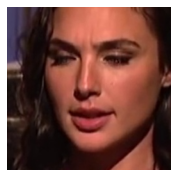

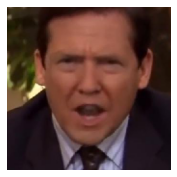

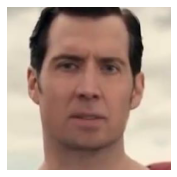

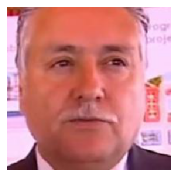

In [32]:
# 3 - Predict
for i in range(generator_test.n):
    X1, y1 = generator_test.next()
    #print(f"\nCorrect prediction: {round(1 - classifier.predict(X1)[0][0]) == y1[0]}")
    #print(classifier.predict(X1)[0][0])
#     print(round(classifier.predict(X1)[0][0]))
#     print(y1[0])
    print('Predicted :', round(classifier.predict(X1)[0][0]), '\nReal class :', y1)
    plt.figure(figsize=(6, 3))
    plt.imshow(X1[0])
    plt.axis('off')